# Somesh Oza MM31456

## 1b: write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out. 

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Paths to the Excel files
training_data_path = 'training data.xlsx'
testing_data_path = 'testing data.xlsx'

# Load the datasets from Excel files
training_data = pd.read_excel(training_data_path)
testing_data = pd.read_excel(testing_data_path)

# Encoding the 'Category' column
label_encoder = LabelEncoder()
training_data['Category'] = label_encoder.fit_transform(training_data['Category'])
testing_data['Category'] = label_encoder.transform(testing_data['Category'])

# Separate features and labels for training
X_train = training_data[['win', 'click', 'team', 'claim', 'reminder']]
y_train = training_data['Category']

# Separate features and labels for testing
X_test = testing_data[['win', 'click', 'team', 'claim', 'reminder']]
y_test = testing_data['Category']

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# KNN Classifier (k=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

nb_report = classification_report(y_test, nb_predictions)
knn_report = classification_report(y_test, knn_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("\nNaive Bayes Classification Report:\n", nb_report)
print("\nKNN Classification Report:\n", knn_report)


Naive Bayes Accuracy: 0.84
KNN Accuracy: 0.84

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.69      0.82        13

    accuracy                           0.84        25
   macro avg       0.88      0.85      0.84        25
weighted avg       0.88      0.84      0.84        25


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.69      0.82        13

    accuracy                           0.84        25
   macro avg       0.88      0.85      0.84        25
weighted avg       0.88      0.84      0.84        25



## 2a: let’s create a ROC together (Refer to ROC_dataset.csv)
## Step1: Given the threshold, derive True Positive and False Positive 
## Step2: Calculate the True Positive Rate (TPR) and False Positive Rate (FPR), enter the values into the sheet 
## Step3: plot the set points (FRP, TPR) on the ROC diagram


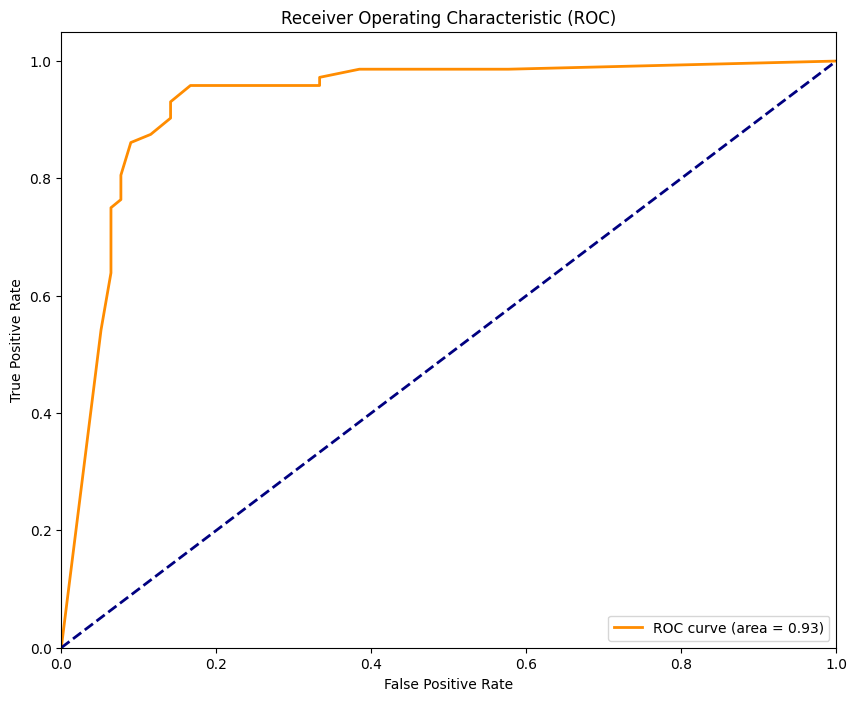

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the data
file_path = 'ROC.xlsx'
data = pd.read_excel(file_path)

# Define thresholds
thresholds = np.array([1,0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50,
                       0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15, 0.10, 0.05,0])

# Initialize arrays for TPR and FPR
tpr_list = []
fpr_list = []

# Get total positives and negatives
total_positives = data['True_Label'].sum()
total_negatives = len(data) - total_positives

# Calculate TPR and FPR for each threshold
for threshold in thresholds:
    # Make predictions based on the threshold
    data['Predicted_Label'] = (data['Prediction'] >= threshold).astype(int)
    
    # Calculate TP, FP, TN, FN
    TP = ((data['Predicted_Label'] == 1) & (data['True_Label'] == 1)).sum()
    FP = ((data['Predicted_Label'] == 1) & (data['True_Label'] == 0)).sum()
    TN = ((data['Predicted_Label'] == 0) & (data['True_Label'] == 0)).sum()
    FN = ((data['Predicted_Label'] == 0) & (data['True_Label'] == 1)).sum()
    
    # Compute TPR and FPR
    TPR = TP / total_positives if total_positives else 0
    FPR = FP / total_negatives if total_negatives else 0
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Convert lists to numpy arrays for plotting
fpr_array = np.array(fpr_list)
tpr_array = np.array(tpr_list)

# Compute AUC
roc_auc = auc(fpr_array, tpr_array)

# Plotting the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_array, tpr_array, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





# 2b. Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth) 

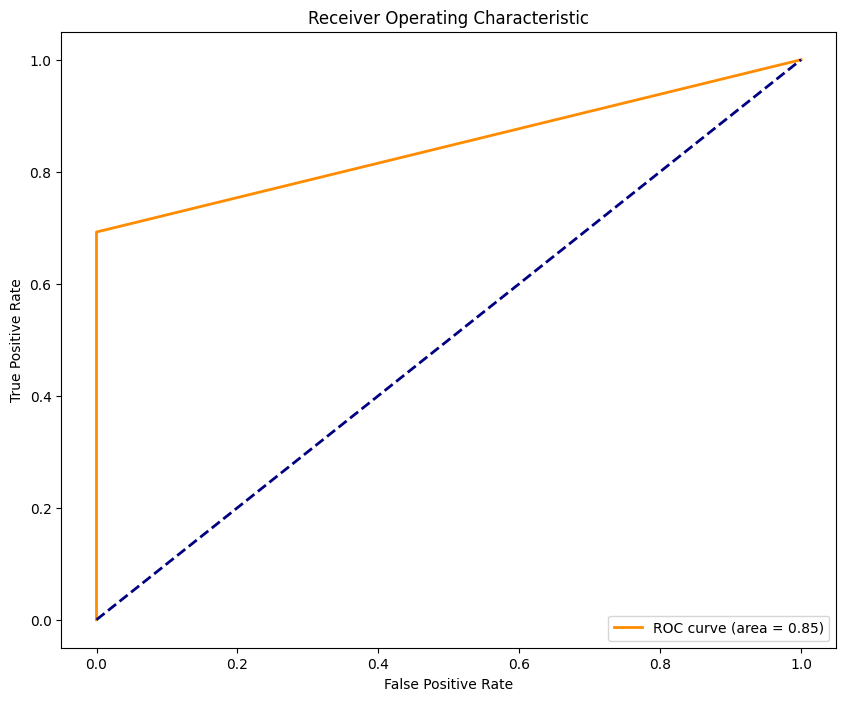

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load the training and testing data
train_data_path = 'Training data.xlsx'
test_data_path = 'Testing data.xlsx'

train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)

# Encode the 'Category' column to binary format
le = LabelEncoder()
train_data['Category'] = le.fit_transform(train_data['Category'])
test_data['Category'] = le.transform(test_data['Category'])

# Prepare the feature columns and target
feature_cols = ['win', 'click', 'team', 'claim', 'reminder']
X_train = train_data[feature_cols]
y_train = train_data['Category']
X_test = test_data[feature_cols]
y_test = test_data['Category']

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
test_probabilities = nb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Define the thresholds
thresholds = np.array([2,1,0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50,
                       0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15, 0.10, 0.05,0])

# Initialize lists to store TPR and FPR
tpr_list = []
fpr_list = []

# Calculate TPR and FPR for each threshold
for threshold in thresholds:
    # Apply threshold
    predictions = (test_probabilities >= threshold).astype(int)
    
    # Calculate TP, FP, TN, FN
    TP = ((predictions == 1) & (y_test == 1)).sum()
    FP = ((predictions == 1) & (y_test == 0)).sum()
    TN = ((predictions == 0) & (y_test == 0)).sum()
    FN = ((predictions == 0) & (y_test == 1)).sum()
    
    # Compute TPR and FPR
    TPR = TP / (TP + FN) if (TP + FN) else 0
    FPR = FP / (FP + TN) if (FP + TN) else 0
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)
roc_auc = auc(fpr_list, tpr_list)

# Plotting the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
